In [35]:
from pylab import *
import pandas as pd
import seaborn as sns
import GPy as gpy
from datetime import datetime
from dateutil.parser import parse
from IPython.display import display

%matplotlib inline

In [58]:
dnpc = pd.read_csv('New Policy Count.csv',sep='\t',parse_dates=[1],index_col=1)
dnpc.rename_axis({'Point(Actual)':'y'},axis=1,inplace=True)
dnpc['t'] = range(1,len(dnpc)+1)
dnpc = dnpc[['t','y']]
dnpc.dropna(inplace=True) #points after 12/31/2018 are forecasts so Point(Actual)==NaN
dnpc.tail()

,t,y
Date,,
2018-08-31,92,7107.0
2018-09-30,93,5836.0
2018-10-31,94,5600.0
2018-11-30,95,4895.0
2018-12-31,96,4832.0


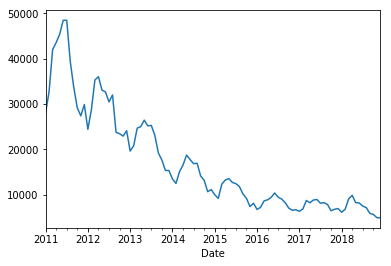

In [59]:
dnpc.y.plot()

In [110]:
kernel = gpy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [111]:
x = dnpc.t.values[:,None]
y = dnpc.y.values[:,None]
logy = log10(y)

m = gpy.models.GPRegression(x,logy,kernel)

In [112]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a27600610>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a27600b50>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a27600590>]]}

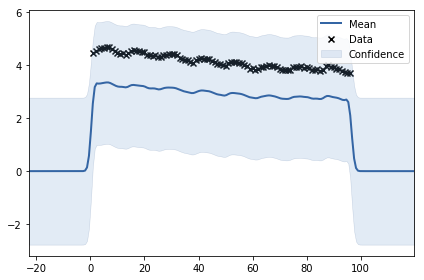

In [113]:
m.plot()

In [114]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [115]:
m.optimize_restarts(num_restarts=10)

Optimization restart 1/10, f = -115.691670424
Optimization restart 2/10, f = -115.691670426
Optimization restart 3/10, f = -115.691670426
Optimization restart 4/10, f = -97.7472541349
Optimization restart 5/10, f = -115.691670426
Optimization restart 6/10, f = -115.691670426
Optimization restart 7/10, f = -115.691670425
Optimization restart 8/10, f = -115.691670409
Optimization restart 9/10, f = -115.691670426
Optimization restart 10/10, f = -115.691670425


In [116]:
m

GP_regression.,value,constraints,priors
rbf.variance,8.433493725507104,+ve,
rbf.lengthscale,7.726505214313797,+ve,
Gaussian_noise.variance,0.0008608491101243956,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a2784c590>],
 'gpdensity': [[<matplotlib.collections.PolyCollection at 0x1a2784ce90>]],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a2784c510>]]}

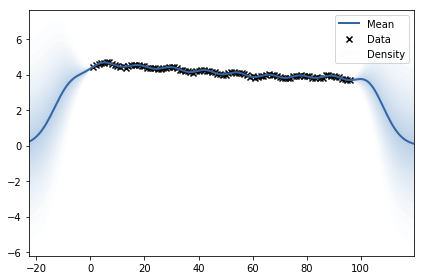

In [119]:
m.plot(plot_density=True)

In [123]:
type(m)

GPy.models.gp_regression.GPRegression

In [126]:
mdict = m.to_dict()

In [127]:
mdict.keys()

['kernel', 'name', 'inference_method', 'Y', 'X', 'likelihood', 'class']

In [134]:
mdict['name']

'GP regression'